In [2]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

import numpy as np
import pandas as pd

endf_database = pd.read_csv(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.csv'))
modes = np.concatenate(endf_database['Decay_Modes'].apply(eval).to_numpy())

modes_series = pd.Series(modes)
unique_modes = modes_series.unique()

print(f"Decay Modes: {unique_modes}")

print("Decay Mode Counts:")
print(modes_series.value_counts())

total_decay_modes = endf_database['Num_Decay_Modes'].sum()
print("Total number of decay modes:", total_decay_modes)

count_num_decay_modes_ge_2 = (endf_database['Num_Decay_Modes'] >= 2).sum()
print("Number of records with Num_Decay_Modes >= 2:", count_num_decay_modes_ge_2)

filtered_data = endf_database[(endf_database['A'] >= 70) & (endf_database['A'] <= 208)]
filtered_data = filtered_data[filtered_data['Num_Decay_Modes'] >= 2]

count_filtered = len(filtered_data)
print("Number of records with 70 <= A <= 208 and Num_Decay_Modes >= 2:", count_filtered)

Decay Modes: ['β+&EC' 'α' 'IT' 'β-' 'β-,n' None 'n' 'β-,2n' 'SF' 'p' '2p' 'β+,p' 'β+,α'
 '2β-' 'β-,α' 'β+,2p' 'β+,SF' '2n' 'β-,3n' 'β-,4n']
Decay Mode Counts:
β+&EC    1605
β-       1410
α         799
IT        443
β-,n      388
SF        125
β+,p      116
β-,2n     111
p         107
n          23
β+,α       21
β-,3n      14
2p         12
β-,α        6
2β-         6
β+,2p       4
β+,SF       3
2n          2
β-,4n       2
Name: count, dtype: int64
Total number of decay modes: 5211
Number of records with Num_Decay_Modes >= 2: 1394
Number of records with 70 <= A <= 208 and Num_Decay_Modes >= 2: 978


In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

import numpy as np
import pandas as pd

df_endf = pd.read_csv(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.csv'))

nuclides = df_endf[df_endf['Half_Life_Second'] == 0]['Radionuclide']

half_lives_second = [3.53e20, np.inf, np.inf, np.inf, np.inf, 1.45e26, np.inf, np.inf, np.inf, ]

for nuclide in nuclides:
    print(nuclide)
#     df_endf[df_endf['Radionuclide'] == nuclide]['Half_Life_Second'] = 2


#     print(df_endf[df_endf['Radionuclide'] == nuclide])

# # print(half_life_second)

In [14]:
print(4.6e18 * 365.25 * 24 * 60 * 60)

1.4516495999999999e+26


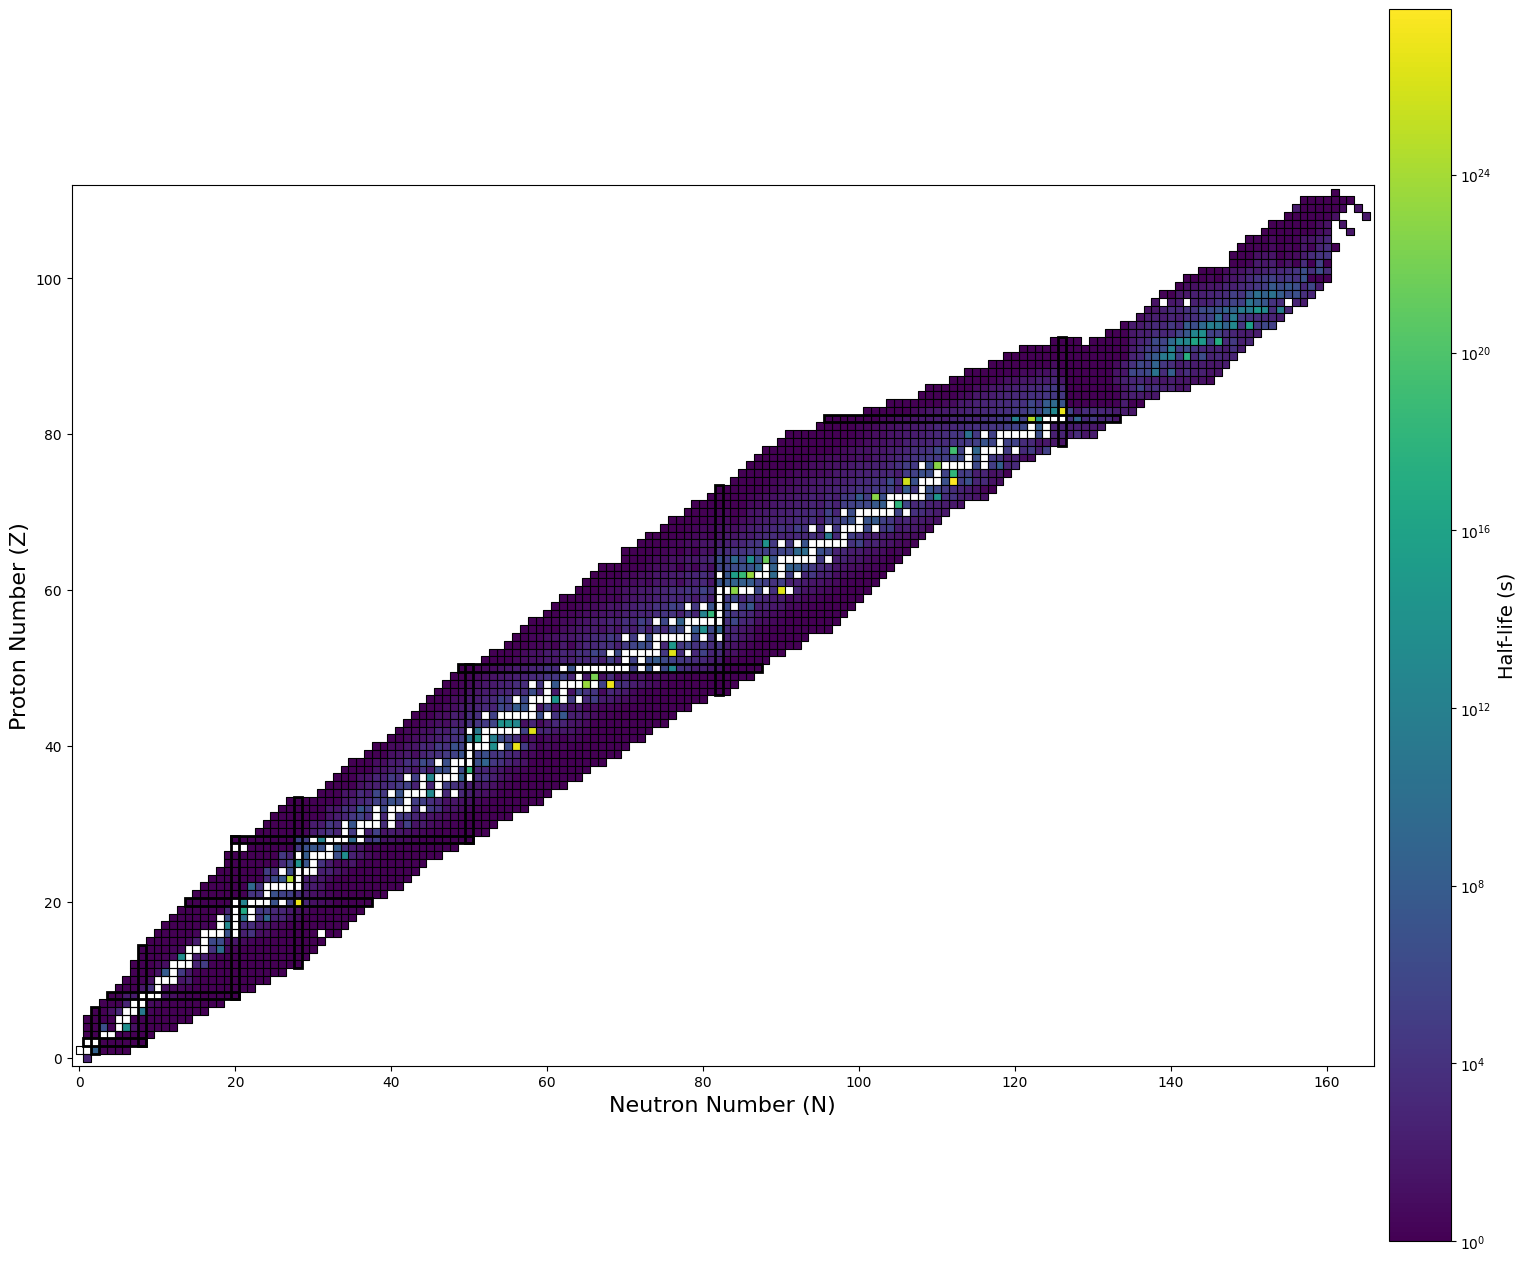

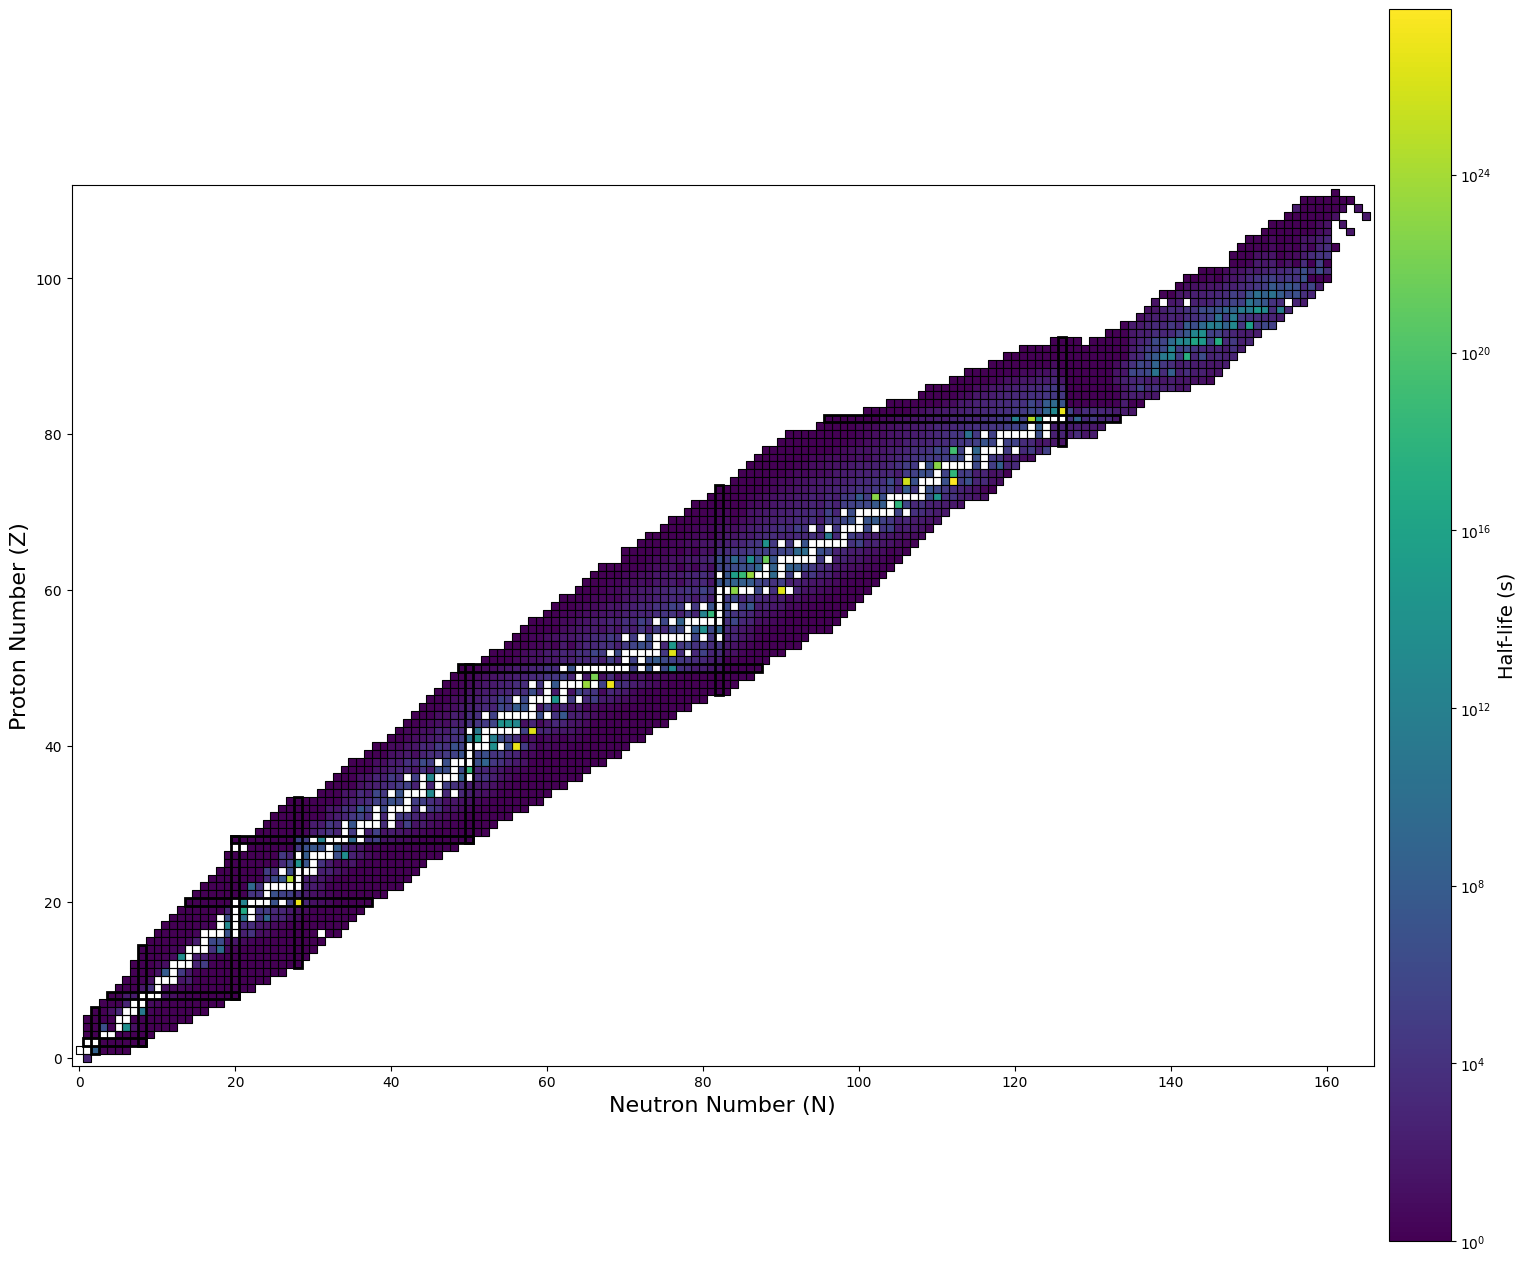

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca import load_decay_database

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')

decay_database.plot_nuclear_chart()

# print('Radionuclides: ', decay_database.nuclides)
# print('---------------------')
# print('Half life data: ', decay_database.half_life_data)
# print('---------------------')
# print('Decay modes data: ', decay_database.decay_modes_data)
# print('---------------------')
# print('Branching_ratios_data: ', decay_database.branching_ratios_data)
# print('---------------------')
# print('Progeny_data: ', decay_database.progeny_data)
# print('---------------------')
# print('Progeny_data: ', decay_database.decay_energies_data)
# print('---------------------')
# print('Decay Energies data: ', decay_database.decay_energies_data)

In [5]:
print(decay_database.decay_energy_EM('Th232'))

1372.332


In [6]:
print(decay_database.branching_ratios('Fe56'))
print(decay_database.decay_modes('Fe56'))
print(decay_database.half_life('Fe56', 's'))

[]
[]
inf


SyntaxError: invalid syntax (333691703.py, line 1)

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import ast

df_endf = pd.read_csv(Path.cwd().resolve().parents[1].joinpath('data/ENDF-B-VII.1_decay.csv'))

RADIONUCLIDE = 'Radionuclide'
print(df_endf[RADIONUCLIDE])










# sorted_df = df_endf.sort_values(by=['A', 'Z', 'Metastable_State'], ascending=[False, False, False])

# data = sorted_df.to_dict('records')

# swapped = True

# while swapped:
#     swapped = False
#     name_to_index = {row['Radionuclide']: idx for idx, row in enumerate(data)}

#     for i in range(len(data)):
#         current_row = data[i]
#         decay_modes = current_row['Decay_Modes']

#         if 'β-' not in decay_modes:
#             continue
#         beta_indices = [idx for idx, mode in enumerate(decay_modes) if mode == 'β-']
#         for beta_idx in beta_indices:
#             progeny_name = current_row['Progeny'][beta_idx]

#             if progeny_name not in name_to_index:
#                 continue
#             j = name_to_index[progeny_name]
#             progeny_row = data[j]
#             if current_row['A'] == progeny_row['A'] and progeny_row['Z'] == current_row['Z'] + 1:
#                 if i > j:
#                     data[i], data[j] = data[j], data[i]
#                     swapped = True
            
#                     break  
#         if swapped:
#             break  


# sorted_df = pd.DataFrame(data)
# sorted_df.reset_index(drop=True, inplace=True)
# sorted_df = sorted_df[df_endf.columns]

# # 结果即为处理后的df_endf
# df_sorted = sorted_df

# df_sorted['Branching_Ratios'] = np.array(df_sorted['Branching_Ratios'])

# print(df_sorted['Branching_Ratios'])



# df_sorted.to_json(Path.cwd().resolve().parents[1].joinpath('data/ENDF-B-VIII.1_decay_sorted.json'), orient='records', indent=4)

0       Ru-113
1       Ac-217
2        I-140
3       Gd-138
4        Mo-91
         ...  
3814    Dy-165
3815     Se-78
3816     W-165
3817    Lr-262
3818    Sn-129
Name: Radionuclide, Length: 3819, dtype: object


In [2]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
import pandas as pd

from KNdecay.radioactivedecay.decay_database import sort_algorithm

df_endf = pd.read_csv(Path.cwd().resolve().parents[1].joinpath('data/ENDF-B-VIII.1_decay.csv'))

print(sort_algorithm(df_endf))


2753    279
3088    273
1208    273
1025    273
1070    272
       ... 
1741      4
3444      3
806       3
1877      2
3651      1
Name: A, Length: 3819, dtype: int64
